<a href="https://colab.research.google.com/github/Darshini-A/Deep-Learning/blob/main/BiLSTM%208%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Implement text classification of movie review using BI-LSTM

In [16]:
import numpy as np
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dropout
from keras.layers import Dense, Embedding, LSTM, Bidirectional

In [17]:
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

In [18]:
max_len = 200
x_train = sequence.pad_sequences(x_train, maxlen = max_len)
x_test = sequence.pad_sequences(x_test, maxlen = max_len)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [19]:
x_train.shape, y_train.shape

((25000, 200), (25000,))

In [20]:
x_test.shape, y_test.shape

((25000, 200), (25000,))

In [21]:
n_unique_words = 10000

model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length = max_len))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [22]:
history = model.fit(x_train, y_train,
                    batch_size = 300,
                    epochs = 5,
                    validation_data = [x_test, y_test])

print(history.history['loss'])
print(history.history['accuracy'])

Epoch 1/5
84/84 [==============================] - 90s 1s/step - loss: 0.5970 - accuracy: 0.6802 - val_loss: 0.4074 - val_accuracy: 0.8407
Epoch 2/5
84/84 [==============================] - 104s 1s/step - loss: 0.3065 - accuracy: 0.8783 - val_loss: 0.3418 - val_accuracy: 0.8606
Epoch 3/5
84/84 [==============================] - 103s 1s/step - loss: 0.2107 - accuracy: 0.9232 - val_loss: 0.3297 - val_accuracy: 0.8670
Epoch 4/5
84/84 [==============================] - 82s 973ms/step - loss: 0.1615 - accuracy: 0.9440 - val_loss: 0.3353 - val_accuracy: 0.8652
Epoch 5/5
84/84 [==============================] - 101s 1s/step - loss: 0.1280 - accuracy: 0.9575 - val_loss: 0.3792 - val_accuracy: 0.8645
[0.5969709753990173, 0.3065122961997986, 0.21070201694965363, 0.16145704686641693, 0.12800286710262299]
[0.6801599860191345, 0.8783199787139893, 0.9232000112533569, 0.9440400004386902, 0.9574800133705139]


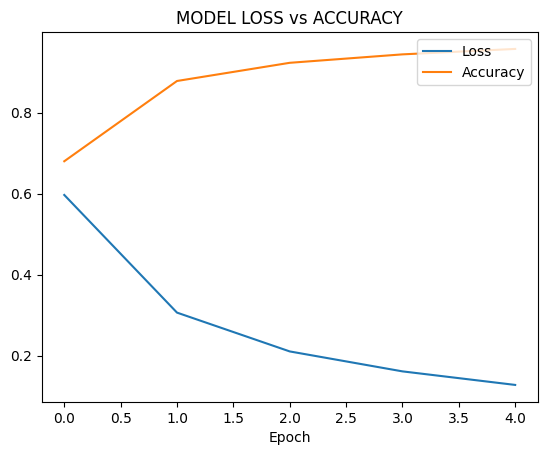

In [23]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('MODEL LOSS vs ACCURACY')
pyplot.xlabel('Epoch')
pyplot.legend(['Loss', 'Accuracy'], loc = 'upper right')
pyplot.show()